In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

## Loading Data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
X_train.shape

(60000, 28, 28)

In [54]:
X_test.shape

(10000, 28, 28)

In [0]:
input_size = X_train.shape[1] * X_test.shape[2]

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
categories = y_train.shape[1]

## Building Model 

In [0]:
def categoricalmodel():
    model = Sequential()
    
    model.add(Dense(int(input_size/2), activation = 'relu', input_shape = (input_size, )))
    model.add(Dense(int(input_size/4), activation = 'relu'))
    model.add(Dense(int(input_size/8), activation = 'relu'))
    model.add(Dense(categories, activation = 'softmax'))
    
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = categoricalmodel()

In [66]:
history = model.fit(x = X_train, y = y_train, validation_split = 0.2, epochs = 10, verbose = 1, shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 340us/step - loss: 0.2230 - acc: 0.9321 - val_loss: 0.1377 - val_acc: 0.9585
Epoch 2/10
48000/48000 [==============================] - 15s 312us/step - loss: 0.0946 - acc: 0.9708 - val_loss: 0.0933 - val_acc: 0.9728
Epoch 3/10
48000/48000 [==============================] - 16s 328us/step - loss: 0.0637 - acc: 0.9800 - val_loss: 0.1021 - val_acc: 0.9718
Epoch 4/10
48000/48000 [==============================] - 16s 329us/step - loss: 0.0506 - acc: 0.9846 - val_loss: 0.0963 - val_acc: 0.9758
Epoch 5/10
48000/48000 [==============================] - 16s 330us/step - loss: 0.0412 - acc: 0.9866 - val_loss: 0.0898 - val_acc: 0.9762
Epoch 6/10
48000/48000 [==============================] - 16s 327us/step - loss: 0.0346 - acc: 0.9886 - val_loss: 0.1091 - val_acc: 0.9723
Epoch 7/10
48000/48000 [==============================] - 15s 321us/step - loss: 0.0293 - acc: 0.9906 - val_loss: 0.

In [67]:
history.history

{'acc': [0.9320625,
  0.97075,
  0.98,
  0.9845625,
  0.9866041666666666,
  0.9886458333333333,
  0.9906458333333333,
  0.9926666666666667,
  0.9925625,
  0.9934791666666667],
 'loss': [0.22299765977511804,
  0.09461666771466844,
  0.06372009898074127,
  0.05059423028879974,
  0.04118871412786514,
  0.03459473480835246,
  0.029308947538149367,
  0.023895755202085638,
  0.023942423896133276,
  0.020946798643278954],
 'val_acc': [0.9585,
  0.9728333333333333,
  0.97175,
  0.9758333333333333,
  0.97625,
  0.9723333333333334,
  0.9751666666666666,
  0.9691666666666666,
  0.9735,
  0.9705833333333334],
 'val_loss': [0.13774931139374771,
  0.09329332194911936,
  0.10211209339392371,
  0.0962825751803272,
  0.08984303264440678,
  0.1091004923517321,
  0.0997729944322491,
  0.13390334585475103,
  0.11877105436193779,
  0.12916024736118925]}

In [68]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 58us/step


[0.12340905636243915, 0.9705]

## Plotting the training and validation accuracy

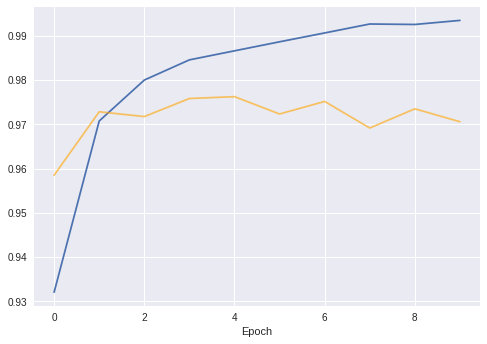

In [69]:
plt.plot(range(10), history.history['acc'])
plt.plot(range(10), history.history['val_acc'], color = 'orange', alpha = 0.6)
plt.xlabel('Epoch')
plt.show()